In [1]:
import xarray as xr
import numpy as np
import dask
import matplotlib.pyplot as plt
from utils import geo
import pandas as pd
import regionmask
from dask.diagnostics import ProgressBar
import glob
import os

In [2]:
dataset = 'globcolour-cmems'
frequency = 'day'
variable = 'CHL'
yearstart = 1998
yearend = 2023
monthorder = 'JANtoDEC'
averaging = 'wmean-latlon'

In [3]:
rootdir = '/projects/SOCCOM/datasets/GlobColour/'
local = 'CMEMS/OCEANCOLOUR_GLO_BGC_L4_MY_009_104-TDS/SouthernOcean_55Sto80S/'+frequency+'/bymonth/'
filename = 'cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D_*.nc'

print('Opening.')
paths = glob.glob(rootdir+local+filename)
with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ds = xr.open_mfdataset(paths,use_cftime=True)
# ds['time'] = pd.to_datetime(ds['time'].values)
# Get area
ds,xgrid = geo.get_xgcm_horizontal(ds,axes_dims_dict={'X':'lon','Y':'lat'},periodic='X')
ds['area'] = ds['dxC']*ds['dyC']

Opening.


In [4]:
ds

<xarray.Dataset>
Dimensions:          (time: 9399, lat: 601, lon: 8640, lon_left: 8640,
                      lat_left: 601)
Coordinates:
  * time             (time) object 1997-09-04 00:00:00 ... 2023-08-20 00:00:00
  * lat              (lat) float32 -54.98 -55.02 -55.06 ... -79.9 -79.94 -79.98
  * lon              (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lon_left         (lon_left) float32 -180.0 -180.0 -179.9 ... 179.9 180.0
  * lat_left         (lat_left) float32 -54.96 -55.0 -55.04 ... -79.92 -79.96
Data variables:
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(19, 601, 8640), meta=np.ndarray>
    CHL              (time, lat, lon) float32 dask.array<chunksize=(19, 601, 8640), meta=np.ndarray>
    flags            (time, lat, lon) int8 dask.array<chunksize=(19, 601, 8640), meta=np.ndarray>
    dxG              (lon_left, lat) float32 2.654e+03 2.651e+03 ... 807.9 804.6
    dyG              (lon, lat_left) float32 nan -4.625e+03 ... -4.625e+03
    dxC              (lon, lat) float32 2.654e+03 2.651e+03 ... 807.9 804.6
    dyC              (lon, lat) float32 -4.625e+03 -4.625e+03 ... -4.626e+03 nan
    rC               (lon, lat) float32 -1.227e+07 -1.226e+07 ... -3.737e+06 nan
    area             (lon, lat) float32 -1.227e+07 -1.226e+07 ... -3.737e+06 nan
Attributes: (12/92)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l4-gapf...
    ...                              ...
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2023-08-28T01:41:45Z
    nb_valid_bins:                   20785524
    pct_valid_bins:                  55.68823945473251
    History:                         Translated to CF-1.0 Conventions by Netc...

In [5]:
ds = ds.chunk({'time':'auto'})
ds

<xarray.Dataset>
Dimensions:          (time: 9399, lat: 601, lon: 8640, lon_left: 8640,
                      lat_left: 601)
Coordinates:
  * time             (time) object 1997-09-04 00:00:00 ... 2023-08-20 00:00:00
  * lat              (lat) float32 -54.98 -55.02 -55.06 ... -79.9 -79.94 -79.98
  * lon              (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lon_left         (lon_left) float32 -180.0 -180.0 -179.9 ... 179.9 180.0
  * lat_left         (lat_left) float32 -54.96 -55.0 -55.04 ... -79.92 -79.96
Data variables:
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(6, 601, 8640), meta=np.ndarray>
    CHL              (time, lat, lon) float32 dask.array<chunksize=(6, 601, 8640), meta=np.ndarray>
    flags            (time, lat, lon) int8 dask.array<chunksize=(25, 601, 8640), meta=np.ndarray>
    dxG              (lon_left, lat) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
    dyG              (lon, lat_left) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
    dxC              (lon, lat) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
    dyC              (lon, lat) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
    rC               (lon, lat) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
    area             (lon, lat) float32 dask.array<chunksize=(8640, 601), meta=np.ndarray>
Attributes: (12/92)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l4-gapf...
    ...                              ...
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2023-08-28T01:41:45Z
    nb_valid_bins:                   20785524
    pct_valid_bins:                  55.68823945473251
    History:                         Translated to CF-1.0 Conventions by Netc...

In [6]:
# Apply a landmask
mask = regionmask.defined_regions.natural_earth.land_110.mask(ds['lon'], ds['lat'])
mask = mask.where(np.isfinite(mask),1)
mask = mask.where(mask==1,np.nan)
# mask.plot()
ds[variable] = ds[variable].fillna(0)*mask

/home/graemem/.conda/envs/core/lib/python3.10/site-packages/regionmask/defined_regions/_natural_earth.py:471: FutureWarning: ``regionmask.defined_regions.natural_earth`` is deprecated. Please use ``regionmask.defined_regions.natural_earth_v4_1_0`` or ``regionmask.defined_regions.natural_earth_v5_0_0`` instead.
  warnings.warn(


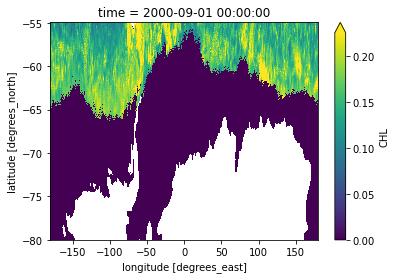

In [7]:
ds[variable].sel(time='2000-09-01').plot(robust=True)

### By sector

In [11]:
# Regional averages
bound_dicts = {
    'PanAntarctic':None,
    'Weddell':[-60,20],
    'Indian':[20,90],
    'WestPacific':[90,160],
    'Ross':[160,-130],
    'AB':[-130,-60]
}

dsmean = xr.Dataset(coords = {'time':ds['time']})

for sector,bounds in bound_dicts.items():
    print(sector)
    # Specify bounds
    if sector=='PanAntarctic':
        cond = xr.ones_like(ds['area'])
    elif bounds[0]>bounds[1]:
        cond = (ds['lon']>=bounds[0]) | (ds['lon']<bounds[1])
    else:
        cond = (ds['lon']>=bounds[0]) & (ds['lon']<bounds[1])
    # Apply sector mask
    with dask.config.set(**{'array.slicing.split_large_chunks': False}):
        dssector = ds.where(cond,drop=True)
        
    dsmean[sector] = dssector[variable].weighted(dssector['area'].fillna(0)).mean(['lat','lon'])
# Rechunk
dsmean = dsmean.chunk({'time':'auto'})

PanAntarctic
Weddell
Indian
WestPacific
Ross
AB


In [12]:
# Remove leap year day and convert calendar
dsmean_noleap = dsmean.sel(time=~((dsmean.time.dt.month == 2) & (dsmean.time.dt.day == 29))).convert_calendar('noleap')
# Group by day of year and compute variance
dsvar = dsmean_noleap.groupby('time.dayofyear').std()**2

In [13]:
# Save to netcdf
outdir = '../../data/'
yearstr = str(yearstart)+'-'+str(yearend)
outpath = outdir+'.'.join([dataset,frequency,averaging,monthorder,yearstr,'ForBuchovecky','nc'])
with ProgressBar():
    dsvar.to_netcdf(outpath)

[########################################] | 100% Completed | 16m 30s
